In [91]:
import pandas as pd
import numpy as np

firmo = pd.read_csv("Firmographic_Information-0.csv")
financial = pd.read_csv("Financials_Annual_-0.csv")
firmo.loc[:,["BQ_ID","BQ_COMPANY_NAME","BQ_COMPANY_ADDRESS1_ZIP5","BQ_COMPANY_ADDRESS1_ZIP9"]].loc[firmo["BQ_ID"] == 100009211630]

,BQ_ID,BQ_COMPANY_NAME,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_ADDRESS1_ZIP9
5216,100009211630,US NUCLEAR CORP.,NaN,NaN


# Création du dataset join, financial & firmographic 

In [92]:
firmo["BQ_COMPANY_ADDRESS1_ZIP5"].isna().sum()

186

### On a 186 valeurs manquantes pour le zip sur 5302 entreprises 

In [93]:
firmo.loc[firmo["BQ_COMPANY_ADDRESS1_ZIP5"].isna()].loc[:,["BQ_COMPANY_ADDRESS1_ZIP5","BQ_COMPANY_ADDRESS1_LINE_1","BQ_COMPANY_ADDRESS1_CITY","BQ_COMPANY_ADDRESS1_STATE"]]

,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_ADDRESS1_LINE_1,BQ_COMPANY_ADDRESS1_CITY,BQ_COMPANY_ADDRESS1_STATE
79,NaN,NaN,Las Vegas,NV
118,NaN,"New Castle, DE",NaN,No State Reported
148,NaN,"New Castle, DE",NaN,No State Reported
149,NaN,Care of Citius Pharmaceuticals Cranford,NaN,No State Reported
167,NaN,NaN,NaN,TX
...,...,...,...,...
4822,NaN,"New Castle, DE",NaN,No State Reported
4970,NaN,NaN,Garden City,NY
5155,NaN,NaN,NaN,NY
5216,NaN,NaN,NaN,CA


Mais on pourra dans le futur recrée ces valeurs manquantes à partir d'autres colonnes comme address, city ou state. 

Pour l'instant je décide de les drop

In [94]:
firmo = firmo.dropna(subset=["BQ_COMPANY_ADDRESS1_ZIP5"], axis='index')
firmo.loc[:,["BQ_ID","BQ_COMPANY_NAME","BQ_COMPANY_ADDRESS1_ZIP5","BQ_COMPANY_ADDRESS1_ZIP9"]].sample(5)

,BQ_ID,BQ_COMPANY_NAME,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_ADDRESS1_ZIP9
315,100003882711,HANESBRANDS INC,27105.0,27105-1384
1709,100005103054,LAUREATE EDUCATION INC,33130.0,33130-3402
4592,100008827699,TOLL BROTHERS INC,19034.0,19034-3204
3679,100003089202,META PLATFORMS INC,94025.0,94025-1455
4360,100005435161,MAIN STREET CAPITAL CORP,77056.0,77056-3011


In [95]:
df = (financial.set_index("BQ_ID").join(firmo.loc[:,["BQ_ID","BQ_COMPANY_NAME","BQ_COMPANY_ADDRESS1_ZIP5","BQ_COMPANY_ADDRESS1_ZIP9"]].set_index("BQ_ID"), rsuffix="firmo")).reset_index()
df = df.dropna(subset=["BQ_COMPANY_ADDRESS1_ZIP5"], axis='index')
df.sample(3)

,BQ_ID,BQ_COMPANY_NAME,BQ_WEBSITE,BQ_YEAR,BQ_REVENUE,BQ_EBITDA,BQ_COR,BQ_NET_INCOME,BQ_GROSS_PROFIT,BQ_TOTAL_ASSETS,...,BQ_TOTAL_DEBT,BQ_TOTAL_LIABILITIES,BQ_SHAREHOLDERS_EQUITY,BQ_TOTAL_LIABILITIES_AND_EQUITY,BQ_CURRENT_RATIO,BQ_QUICK_RATIO,BQ_DEBT_TO_EQUITY_RATIO,BQ_COMPANY_NAMEfirmo,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_ADDRESS1_ZIP9
41714,100004329331,INMUNE BIO INC,https://www.inmunebio.com/,2017,1875845.0,325573.0,688881.0,114777.0,1186964.0,2.305486e+06,...,NaN,3.097170e+05,18103753.0,3.097170e+05,6.132921,NaN,NaN,INMUNE BIO INC,92037.0,92037-3608
45510,100005331029,"LUMENT FINANCE TRUST, INC.",https://www.fiveoaksinvestment.com,2023,31868780.0,19285146.0,0.0,19714496.0,31868780.0,1.446932e+09,...,NaN,1.206140e+09,240792380.0,1.206140e+09,NaN,NaN,NaN,"LUMENT FINANCE TRUST, INC.",21093.0,21093-2252
41068,100004245977,IMMERSION CORP,https://www.immersion.com/,2011,30635000.0,-508000.0,1255000.0,-3430000.0,29380000.0,7.467900e+07,...,NaN,2.305800e+07,51621000.0,2.305800e+07,6.285516,0.937667,NaN,IMMERSION CORP,33180.0,33180-4930


## Les colonnes qui vont nous intéresser sont :

In [96]:
df.columns

Index(['BQ_ID', 'BQ_COMPANY_NAME', 'BQ_WEBSITE', 'BQ_YEAR', 'BQ_REVENUE',
       'BQ_EBITDA', 'BQ_COR', 'BQ_NET_INCOME', 'BQ_GROSS_PROFIT',
       'BQ_TOTAL_ASSETS', 'BQ_OPERATING_EXPENSES', 'BQ_OPERATING_INCOME',
       'BQ_TAX_AND_INTEREST', 'BQ_GROSS_PROFIT_MARGIN', 'BQ_EBITDA_MARGIN',
       'BQ_ASSET_TURNOVER', 'BQ_NET_PROFIT_MARGIN', 'BQ_RETURN_ON_ASSETS',
       'BQ_RETURN_ON_SALES', 'BQ_REVENUE_PER_EMP', 'BQ_EBITDA_PER_EMP',
       'BQ_COR_PER_EMP', 'BQ_NET_INCOME_PER_EMP', 'BQ_GROSS_PROFIT_PER_EMP',
       'BQ_TOTAL_ASSETS_PER_EMP', 'BQ_PAYROLL_PER_EMP',
       'BQ_OPERATING_EXPENSES_PER_EMP', 'BQ_OPERATING_INCOME_PER_EMP',
       'BQ_TAX_AND_INTEREST_PER_EMP', 'BQ_FISCAL_YEAR_END',
       'BQ_CURRENT_ASSETS', 'BQ_CASH',
       'BQ_TRADE_NOTES_AND_ACCOUNTS_RECEIVABLE',
       'BQ_LESS_ALLOWANCE_FOR_BAD_DEBTS', 'BQ_INVENTORIES',
       'BQ_US_GOVERNMENT_OBLIGATIONS', 'BQ_TAX_EXEMPT_SECURITIES',
       'BQ_OTHER_CURRENT_ASSETS', 'BQ_NON_CURRENT_ASSETS',
       'BQ_LOANS_TO_SHARE

In [97]:
features = ['BQ_COMPANY_NAME', 'BQ_YEAR','BQ_TOTAL_ASSETS','BQ_CURRENT_ASSETS', 'BQ_OTHER_NON_CURRENT_ASSETS' 
            ,'BQ_CASH', 'BQ_US_GOVERNMENT_OBLIGATIONS',
            'BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS', 'BQ_LAND',"BQ_DEPLETABLE_ASSETS",
            'BQ_INTANGIBLE_ASSETS_AMORTIZABLE','BQ_TOTAL_DEBT', 'BQ_MORTGAGE_AND_REAL_ESTATE_LOANS']

In [98]:
df[features].loc[df["BQ_COMPANY_NAME"] == "MICROSOFT CORP"]

,BQ_COMPANY_NAME,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_CURRENT_ASSETS,BQ_OTHER_NON_CURRENT_ASSETS,BQ_CASH,BQ_US_GOVERNMENT_OBLIGATIONS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,BQ_LAND,BQ_DEPLETABLE_ASSETS,BQ_INTANGIBLE_ASSETS_AMORTIZABLE,BQ_TOTAL_DEBT,BQ_MORTGAGE_AND_REAL_ESTATE_LOANS
47310,MICROSOFT CORP,2024,4.842750e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47311,MICROSOFT CORP,2023,4.705580e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47312,MICROSOFT CORP,2022,4.119760e+11,1.842570e+11,NaN,3.470400e+10,NaN,1.099870e+11,NaN,NaN,7.725200e+10,NaN,NaN
47313,MICROSOFT CORP,2021,3.648400e+11,1.696840e+11,NaN,1.393100e+10,NaN,8.754600e+10,NaN,NaN,7.882200e+10,NaN,NaN
47314,MICROSOFT CORP,2020,3.337790e+11,1.844060e+11,NaN,1.422400e+10,NaN,7.080300e+10,NaN,NaN,5.751100e+10,NaN,NaN
47315,MICROSOFT CORP,2019,3.013110e+11,1.819150e+11,NaN,1.357600e+10,NaN,5.290400e+10,NaN,NaN,5.038900e+10,NaN,NaN
47316,MICROSOFT CORP,2018,2.865560e+11,1.755520e+11,NaN,1.135600e+10,NaN,4.385600e+10,NaN,NaN,4.977600e+10,NaN,NaN
47317,MICROSOFT CORP,2017,2.588480e+11,1.696620e+11,NaN,1.194600e+10,NaN,3.614600e+10,NaN,NaN,4.373600e+10,7.224200e+10,NaN
47318,MICROSOFT CORP,2016,2.503120e+11,1.626960e+11,NaN,7.663000e+09,NaN,3.028900e+10,NaN,NaN,4.522800e+10,8.514500e+10,NaN
47319,MICROSOFT CORP,2015,1.934680e+11,1.396600e+11,NaN,6.510000e+09,NaN,1.835600e+10,NaN,NaN,2.160500e+10,5.346100e+10,NaN


'BQ_OTHER_NON_CURRENT_ASSETS' : 66 000 valeurs manquantes sur 66283\
'BQ_US_GOVERNMENT_OBLIGATIONS' : 66233 valeurs manquantes sur 66283\
BQ_LAND : 66233 valeurs manquantes sur 66283\
BQ_DEPLETABLE_ASSETS : 66233 valeurs manquantes sur 66283\
BQ_TOTAL_DEBT : 52580 valeurs manquantes sur 662283 \
BQ_MORTGAGE_AND_REAL_ESTATE_LOANS : 66233 valeurs manquantes sur 66283

In [99]:
df["BQ_TOTAL_ASSETS"].isna().sum()

1385

In [100]:
1.147150e+08	/ 3.409779e+09	

0.03364294284175016

<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>

#### <o> Pas mal de valeurs manquantes : idée -> créer des variables agrégés TANGIBLE (immobilier, inventaire, mobilier ..) vs INTANGIBLE (stock, cash, debt..) <\o>
<g> 1ère solution : régresser la proportion de 'BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS' parmis 'BQ_TOTAL_ASSETS' sur les variables climatiques qui nous intéresse


In [113]:
aggreg = df.loc[:,['BQ_COMPANY_NAME', 'BQ_YEAR',"BQ_TOTAL_ASSETS","BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS", 'BQ_COMPANY_ADDRESS1_ZIP5']].dropna(how='all', subset=['BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS'])
aggreg["building_among_total"] = aggreg['BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS'] / aggreg['BQ_TOTAL_ASSETS']
aggreg = aggreg.dropna(how='all', subset=['BQ_TOTAL_ASSETS'])
aggreg = aggreg.loc[(aggreg["building_among_total"]<=1) & (aggreg["building_among_total"]>=0)]
aggreg.sample(5)

,BQ_COMPANY_NAME,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,BQ_COMPANY_ADDRESS1_ZIP5,building_among_total
30019,CORPORATE OFFICE PROPERTIES TRUST,2020,4.077023e+09,3.402855e+09,21046.0,0.834642
9979,ALIGN TECHNOLOGY INC,2013,8.321470e+08,7.574300e+07,95134.0,0.091021
33650,"ENFUSION LTD, LLC.",2021,1.060850e+08,1.305100e+07,60603.0,0.123024
33866,ENTERPRISE FINANCIAL SERVICES CORP,2012,3.325786e+09,2.112100e+07,63132.0,0.006351
37941,GMS INC,2016,1.393265e+09,1.544650e+08,30084.0,0.110865


In [114]:
aggreg.describe()

,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,BQ_COMPANY_ADDRESS1_ZIP5,building_among_total
count,47220.000000,4.722000e+04,4.722000e+04,47220.000000,47220.000000
mean,2017.193795,1.395674e+10,2.067168e+09,50396.114083,0.223163
std,3.935043,1.103666e+11,9.217111e+09,32984.137645,0.257046
min,2010.000000,3.000000e+00,0.000000e+00,745.000000,0.000000
25%,2014.000000,1.040941e+08,7.181000e+06,19406.000000,0.030184
50%,2018.000000,8.860576e+08,7.434900e+07,48320.000000,0.114948
75%,2021.000000,4.312068e+09,6.671958e+08,80301.000000,0.321993
max,2023.000000,4.325437e+12,2.766900e+11,99701.000000,1.000000


Recall : **Current Assets** = Annual time series based current assets value which accounts for all company-owned assets that can be converted to cash within one year. Current assets include cash, cash equivalents, accounts receivable, stock inventory, marketable securities, pre-paid liabilities, and other liquid assets.

In [116]:
aggreg.loc[aggreg["BQ_COMPANY_ADDRESS1_ZIP5"] == 94539.0]

,BQ_COMPANY_NAME,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,BQ_COMPANY_ADDRESS1_ZIP5,building_among_total
4534,ACM RESEARCH INC.,2023,1.490908e+09,208874000.0,94539.0,0.140099
4535,ACM RESEARCH INC.,2022,1.235500e+09,85364000.0,94539.0,0.069093
4536,ACM RESEARCH INC.,2021,1.052179e+09,18224000.0,94539.0,0.017320
4537,ACM RESEARCH INC.,2020,3.412570e+08,12489000.0,94539.0,0.036597
4538,ACM RESEARCH INC.,2019,2.177030e+08,7506000.0,94539.0,0.034478
4539,ACM RESEARCH INC.,2018,1.030470e+08,3708000.0,94539.0,0.035984
4540,ACM RESEARCH INC.,2017,6.789100e+07,2340000.0,94539.0,0.034467
4541,ACM RESEARCH INC.,2016,4.446700e+07,2262000.0,94539.0,0.050869
4600,ACTELIS NETWORKS INC,2023,1.122300e+07,979000.0,94539.0,0.087232
4601,ACTELIS NETWORKS INC,2022,1.481900e+07,806000.0,94539.0,0.054390


# Joindre les données climatiques via le ZIP code

In [117]:
climate = pd.read_csv("U_S_Climate_Risk_Data-0.csv")
climate

,STATE,ZIP,HEAT_RATING,HEAT_THRESHOLD_F,HEAT_WETBULB_THRESHOLD_F,HEAT_MAGNITUDE_1970_F,HEAT_MAGNITUDE_1975_F,HEAT_MAGNITUDE_1980_F,HEAT_MAGNITUDE_1985_F,HEAT_MAGNITUDE_1990_F,...,FLOOD_TIDAL_EVENTS_2070_P75,FLOOD_TIDAL_EVENTS_2080,FLOOD_TIDAL_EVENTS_2080_P25,FLOOD_TIDAL_EVENTS_2080_P75,FLOOD_TIDAL_EVENTS_2090,FLOOD_TIDAL_EVENTS_2090_P25,FLOOD_TIDAL_EVENTS_2090_P75,FLOOD_TIDAL_EVENTS_2100,FLOOD_TIDAL_EVENTS_2100_P25,FLOOD_TIDAL_EVENTS_2100_P75
0,Massachusetts,1001,65,91.5,73.4,90.4,90.4,90.8,91.0,91.1,...,0,0,0,0,0,0,0,0,0,0
1,Massachusetts,1002,60,89.6,71.3,88.6,88.6,89.0,89.2,89.3,...,0,0,0,0,0,0,0,0,0,0
2,Massachusetts,1003,61,90.3,71.8,89.2,89.2,89.6,89.9,89.9,...,0,0,0,0,0,0,0,0,0,0
3,Massachusetts,1005,54,87.6,69.7,86.4,86.5,86.8,87.1,87.2,...,0,0,0,0,0,0,0,0,0,0
4,Massachusetts,1007,61,89.4,71.2,88.3,88.3,88.7,89.0,89.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33295,Washington,99363,46,97.7,67.6,96.0,96.4,96.8,97.1,97.2,...,0,0,0,0,0,0,0,0,0,0
33296,Washington,99371,45,97.8,65.7,96.1,96.6,96.9,97.2,97.2,...,0,0,0,0,0,0,0,0,0,0
33297,Washington,99401,45,92.2,66.3,90.6,91.1,91.3,91.6,91.6,...,0,0,0,0,0,0,0,0,0,0
33298,Washington,99402,48,94.3,67.2,92.7,93.1,93.4,93.7,93.7,...,0,0,0,0,0,0,0,0,0,0


In [118]:
climate.loc[climate["ZIP"] == 94539]

,STATE,ZIP,HEAT_RATING,HEAT_THRESHOLD_F,HEAT_WETBULB_THRESHOLD_F,HEAT_MAGNITUDE_1970_F,HEAT_MAGNITUDE_1975_F,HEAT_MAGNITUDE_1980_F,HEAT_MAGNITUDE_1985_F,HEAT_MAGNITUDE_1990_F,...,FLOOD_TIDAL_EVENTS_2070_P75,FLOOD_TIDAL_EVENTS_2080,FLOOD_TIDAL_EVENTS_2080_P25,FLOOD_TIDAL_EVENTS_2080_P75,FLOOD_TIDAL_EVENTS_2090,FLOOD_TIDAL_EVENTS_2090_P25,FLOOD_TIDAL_EVENTS_2090_P75,FLOOD_TIDAL_EVENTS_2100,FLOOD_TIDAL_EVENTS_2100_P25,FLOOD_TIDAL_EVENTS_2100_P75
31529,California,94539,26,89.7,61.4,88.5,88.8,89.0,89.2,89.1,...,9,7,3,11,8,4,12,10,6,13


<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>

<o> On va commencer par regarder la réallocation en fonction de la température

In [129]:
features_heat = ['HEAT_RATING', 'HEAT_THRESHOLD_F',
 'HEAT_MAGNITUDE_2005_RCP45_F',
 'HEAT_MAGNITUDE_2010_RCP45_F',
 'HEAT_MAGNITUDE_2015_RCP45_F',
 'HEAT_MAGNITUDE_2020_RCP45_F',
 'HEAT_MAGNITUDE_2025_RCP45_F',
 'HEAT_MAGNITUDE_2030_RCP45_F',
 'HEAT_MAGNITUDE_2035_RCP45_F',
 'HEAT_MAGNITUDE_2040_RCP45_F',
 'HEAT_MAGNITUDE_2045_RCP45_F','HEAT_MAGNITUDE_2050_RCP45_F',
 'HEAT_MAGNITUDE_2055_RCP45_F',
 'HEAT_MAGNITUDE_2060_RCP45_F',
 'HEAT_MAGNITUDE_2005_RCP85_F',
 'HEAT_MAGNITUDE_2010_RCP85_F',
 'HEAT_MAGNITUDE_2015_RCP85_F',
 'HEAT_MAGNITUDE_2020_RCP85_F',
 'HEAT_MAGNITUDE_2025_RCP85_F',
 'HEAT_MAGNITUDE_2030_RCP85_F',
 'HEAT_MAGNITUDE_2035_RCP85_F',
 'HEAT_MAGNITUDE_2040_RCP85_F',
 'HEAT_MAGNITUDE_2045_RCP85_F',
 'HEAT_MAGNITUDE_2050_RCP85_F',
 'HEAT_MAGNITUDE_2055_RCP85_F',
 'HEAT_MAGNITUDE_2060_RCP85_F',

 'HEAT_EVENTS_2005_RCP45',
 'HEAT_EVENTS_2010_RCP45',
 'HEAT_EVENTS_2015_RCP45',
 'HEAT_EVENTS_2020_RCP45',
 'HEAT_EVENTS_2025_RCP45',
 'HEAT_EVENTS_2030_RCP45',
 'HEAT_EVENTS_2035_RCP45',
 'HEAT_EVENTS_2040_RCP45',
 'HEAT_EVENTS_2045_RCP45',
 'HEAT_EVENTS_2050_RCP45',
 'HEAT_EVENTS_2055_RCP45',
 'HEAT_EVENTS_2060_RCP45',

 'HEAT_EVENTS_2005_RCP85',
 'HEAT_EVENTS_2010_RCP85',
 'HEAT_EVENTS_2015_RCP85',
 'HEAT_EVENTS_2020_RCP85',
 'HEAT_EVENTS_2025_RCP85',
 'HEAT_EVENTS_2030_RCP85',
 'HEAT_EVENTS_2035_RCP85',
 'HEAT_EVENTS_2040_RCP85',
 'HEAT_EVENTS_2045_RCP85',
 'HEAT_EVENTS_2050_RCP85',
 'HEAT_EVENTS_2055_RCP85',
 'HEAT_EVENTS_2060_RCP85',


 'HEAT_WETBULB_MAGNITUDE_2005_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2010_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2015_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2020_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2025_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2030_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2035_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2040_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2045_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2050_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2055_RCP45_F',
 'HEAT_WETBULB_MAGNITUDE_2060_RCP45_F',
 
 'HEAT_WETBULB_MAGNITUDE_2005_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2010_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2015_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2020_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2025_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2030_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2035_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2040_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2045_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2050_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2055_RCP85_F',
 'HEAT_WETBULB_MAGNITUDE_2060_RCP85_F',


 'HEAT_WETBULB_EVENTS_2005_RCP45',
 'HEAT_WETBULB_EVENTS_2010_RCP45',
 'HEAT_WETBULB_EVENTS_2015_RCP45',
 'HEAT_WETBULB_EVENTS_2020_RCP45',
 'HEAT_WETBULB_EVENTS_2025_RCP45',
 'HEAT_WETBULB_EVENTS_2030_RCP45',
 'HEAT_WETBULB_EVENTS_2035_RCP45',
 'HEAT_WETBULB_EVENTS_2040_RCP45',
 'HEAT_WETBULB_EVENTS_2045_RCP45',
 'HEAT_WETBULB_EVENTS_2050_RCP45',
 'HEAT_WETBULB_EVENTS_2055_RCP45',
 'HEAT_WETBULB_EVENTS_2060_RCP45',

 'HEAT_WETBULB_EVENTS_2005_RCP85',
 'HEAT_WETBULB_EVENTS_2010_RCP85',
 'HEAT_WETBULB_EVENTS_2015_RCP85',
 'HEAT_WETBULB_EVENTS_2020_RCP85',
 'HEAT_WETBULB_EVENTS_2025_RCP85',
 'HEAT_WETBULB_EVENTS_2030_RCP85',
 'HEAT_WETBULB_EVENTS_2035_RCP85',
 'HEAT_WETBULB_EVENTS_2040_RCP85',
 'HEAT_WETBULB_EVENTS_2045_RCP85',
 'HEAT_WETBULB_EVENTS_2050_RCP85',
 'HEAT_WETBULB_EVENTS_2055_RCP85',
 'HEAT_WETBULB_EVENTS_2060_RCP85']

In [130]:
# change aggreg to df if you want all the features coming from financial dataframe
financ_with_clim = aggreg.set_index("BQ_COMPANY_ADDRESS1_ZIP5").join(climate.set_index("ZIP")[features_heat], how="inner").reset_index()
financ_with_clim.sample(5)

NameError: name 'aggreg' is not defined

In [121]:
financ_with_clim.isna().sum().sort_values()

BQ_COMPANY_ADDRESS1_ZIP5               0
HEAT_WETBULB_MAGNITUDE_2040_RCP85_F    0
HEAT_WETBULB_MAGNITUDE_2035_RCP85_F    0
HEAT_WETBULB_MAGNITUDE_2030_RCP85_F    0
HEAT_WETBULB_MAGNITUDE_2025_RCP85_F    0
                                      ..
HEAT_MAGNITUDE_2050_RCP85_F            0
HEAT_MAGNITUDE_2045_RCP85_F            0
HEAT_MAGNITUDE_2040_RCP85_F            0
HEAT_EVENTS_2015_RCP45                 0
HEAT_WETBULB_EVENTS_2060_RCP85         0
Length: 132, dtype: int64

In [122]:
financ_with_clim

,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_NAME,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,building_among_total,HEAT_RATING,HEAT_THRESHOLD_F,HEAT_MAGNITUDE_1970_F,HEAT_MAGNITUDE_1975_F,...,HEAT_WETBULB_EVENTS_2015_RCP85,HEAT_WETBULB_EVENTS_2020_RCP85,HEAT_WETBULB_EVENTS_2025_RCP85,HEAT_WETBULB_EVENTS_2030_RCP85,HEAT_WETBULB_EVENTS_2035_RCP85,HEAT_WETBULB_EVENTS_2040_RCP85,HEAT_WETBULB_EVENTS_2045_RCP85,HEAT_WETBULB_EVENTS_2050_RCP85,HEAT_WETBULB_EVENTS_2055_RCP85,HEAT_WETBULB_EVENTS_2060_RCP85
0,92009.0,VIASAT INC,2018,4.242149e+09,2.452619e+09,0.578155,37,91.0,90.0,90.0,...,11,13,16,17,19,24,29,34,38,44
1,92009.0,VIASAT INC,2017,3.414109e+09,1.962475e+09,0.574813,37,91.0,90.0,90.0,...,11,13,16,17,19,24,29,34,38,44
2,92009.0,VIASAT INC,2015,2.397312e+09,1.385107e+09,0.577775,37,91.0,90.0,90.0,...,11,13,16,17,19,24,29,34,38,44
3,92009.0,VIASAT INC,2012,1.794072e+09,3.786910e+08,0.211079,37,91.0,90.0,90.0,...,11,13,16,17,19,24,29,34,38,44
4,92009.0,VIASAT INC,2011,1.727153e+09,2.949730e+08,0.170786,37,91.0,90.0,90.0,...,11,13,16,17,19,24,29,34,38,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44940,92009.0,VIASAT INC,2023,1.632936e+10,7.950283e+09,0.486870,37,91.0,90.0,90.0,...,11,13,16,17,19,24,29,34,38,44
44941,92009.0,VIASAT INC,2022,7.730337e+09,4.660040e+09,0.602825,37,91.0,90.0,90.0,...,11,13,16,17,19,24,29,34,38,44
44942,92009.0,VIASAT INC,2021,6.389346e+09,4.048330e+09,0.633606,37,91.0,90.0,90.0,...,11,13,16,17,19,24,29,34,38,44
44943,92009.0,VIASAT INC,2020,5.349467e+09,3.390939e+09,0.633884,37,91.0,90.0,90.0,...,11,13,16,17,19,24,29,34,38,44


In [123]:
######### FREE MEMORY ###########
del financial
del climate
del df
del aggreg

# Partie Modélisation

In [124]:
z = [ 'HEAT_MAGNITUDE_1970_F',
 'HEAT_MAGNITUDE_1975_F',
 'HEAT_MAGNITUDE_1980_F',
 'HEAT_MAGNITUDE_1985_F',
 'HEAT_MAGNITUDE_1990_F',
 'HEAT_MAGNITUDE_1995_F',
 'HEAT_MAGNITUDE_2000_F',
 'HEAT_MAGNITUDE_2005_RCP45_F',
 'HEAT_MAGNITUDE_2010_RCP45_F',
 'HEAT_MAGNITUDE_2015_RCP45_F',
 'HEAT_MAGNITUDE_2020_RCP45_F',
 'HEAT_MAGNITUDE_2025_RCP45_F',
 'HEAT_MAGNITUDE_2030_RCP45_F',
 'HEAT_MAGNITUDE_2035_RCP45_F',
 'HEAT_MAGNITUDE_2040_RCP45_F',
 'HEAT_MAGNITUDE_2045_RCP45_F',
 'HEAT_MAGNITUDE_2050_RCP45_F',
 'HEAT_MAGNITUDE_2055_RCP45_F',
 'HEAT_MAGNITUDE_2060_RCP45_F',
 'HEAT_MAGNITUDE_2005_RCP85_F',
 'HEAT_MAGNITUDE_2010_RCP85_F',
 'HEAT_MAGNITUDE_2015_RCP85_F',
 'HEAT_MAGNITUDE_2020_RCP85_F',
 'HEAT_MAGNITUDE_2025_RCP85_F',
 'HEAT_MAGNITUDE_2030_RCP85_F',
 'HEAT_MAGNITUDE_2035_RCP85_F',
 'HEAT_MAGNITUDE_2040_RCP85_F',
 'HEAT_MAGNITUDE_2045_RCP85_F',
 'HEAT_MAGNITUDE_2050_RCP85_F',
 'HEAT_MAGNITUDE_2055_RCP85_F',
 'HEAT_MAGNITUDE_2060_RCP85_F']

In [125]:
financ_with_clim.loc[financ_with_clim['BQ_COMPANY_NAME'] == "MICROSOFT CORP"]

,BQ_COMPANY_ADDRESS1_ZIP5,BQ_COMPANY_NAME,BQ_YEAR,BQ_TOTAL_ASSETS,BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS,building_among_total,HEAT_RATING,HEAT_THRESHOLD_F,HEAT_MAGNITUDE_1970_F,HEAT_MAGNITUDE_1975_F,...,HEAT_WETBULB_EVENTS_2015_RCP85,HEAT_WETBULB_EVENTS_2020_RCP85,HEAT_WETBULB_EVENTS_2025_RCP85,HEAT_WETBULB_EVENTS_2030_RCP85,HEAT_WETBULB_EVENTS_2035_RCP85,HEAT_WETBULB_EVENTS_2040_RCP85,HEAT_WETBULB_EVENTS_2045_RCP85,HEAT_WETBULB_EVENTS_2050_RCP85,HEAT_WETBULB_EVENTS_2055_RCP85,HEAT_WETBULB_EVENTS_2060_RCP85
31727,98052.0,MICROSOFT CORP,2022,4.119760e+11,1.099870e+11,0.266974,47,84.5,83.2,83.5,...,16,18,21,24,27,32,38,44,50,56
31728,98052.0,MICROSOFT CORP,2021,3.648400e+11,8.754600e+10,0.239957,47,84.5,83.2,83.5,...,16,18,21,24,27,32,38,44,50,56
31729,98052.0,MICROSOFT CORP,2020,3.337790e+11,7.080300e+10,0.212125,47,84.5,83.2,83.5,...,16,18,21,24,27,32,38,44,50,56
31730,98052.0,MICROSOFT CORP,2019,3.013110e+11,5.290400e+10,0.175579,47,84.5,83.2,83.5,...,16,18,21,24,27,32,38,44,50,56
31731,98052.0,MICROSOFT CORP,2018,2.865560e+11,4.385600e+10,0.153045,47,84.5,83.2,83.5,...,16,18,21,24,27,32,38,44,50,56
31732,98052.0,MICROSOFT CORP,2017,2.588480e+11,3.614600e+10,0.139642,47,84.5,83.2,83.5,...,16,18,21,24,27,32,38,44,50,56
31733,98052.0,MICROSOFT CORP,2016,2.503120e+11,3.028900e+10,0.121005,47,84.5,83.2,83.5,...,16,18,21,24,27,32,38,44,50,56
31734,98052.0,MICROSOFT CORP,2015,1.934680e+11,1.835600e+10,0.094879,47,84.5,83.2,83.5,...,16,18,21,24,27,32,38,44,50,56
31735,98052.0,MICROSOFT CORP,2014,1.744720e+11,1.473100e+10,0.084432,47,84.5,83.2,83.5,...,16,18,21,24,27,32,38,44,50,56
31736,98052.0,MICROSOFT CORP,2013,1.723840e+11,1.301100e+10,0.075477,47,84.5,83.2,83.5,...,16,18,21,24,27,32,38,44,50,56


In [126]:
list(financ_with_clim.loc[financ_with_clim['BQ_COMPANY_NAME'] == "MICROSOFT CORP"].columns)

['BQ_COMPANY_ADDRESS1_ZIP5',
 'BQ_COMPANY_NAME',
 'BQ_YEAR',
 'BQ_TOTAL_ASSETS',
 'BQ_BUILDINGS_AND_OTHER_DEPRECIABLE_ASSETS',
 'building_among_total',
 'HEAT_RATING',
 'HEAT_THRESHOLD_F',
 'HEAT_MAGNITUDE_1970_F',
 'HEAT_MAGNITUDE_1975_F',
 'HEAT_MAGNITUDE_1980_F',
 'HEAT_MAGNITUDE_1985_F',
 'HEAT_MAGNITUDE_1990_F',
 'HEAT_MAGNITUDE_1995_F',
 'HEAT_MAGNITUDE_2000_F',
 'HEAT_MAGNITUDE_2005_RCP45_F',
 'HEAT_MAGNITUDE_2010_RCP45_F',
 'HEAT_MAGNITUDE_2015_RCP45_F',
 'HEAT_MAGNITUDE_2020_RCP45_F',
 'HEAT_MAGNITUDE_2025_RCP45_F',
 'HEAT_MAGNITUDE_2030_RCP45_F',
 'HEAT_MAGNITUDE_2035_RCP45_F',
 'HEAT_MAGNITUDE_2040_RCP45_F',
 'HEAT_MAGNITUDE_2045_RCP45_F',
 'HEAT_MAGNITUDE_2050_RCP45_F',
 'HEAT_MAGNITUDE_2055_RCP45_F',
 'HEAT_MAGNITUDE_2060_RCP45_F',
 'HEAT_MAGNITUDE_2005_RCP85_F',
 'HEAT_MAGNITUDE_2010_RCP85_F',
 'HEAT_MAGNITUDE_2015_RCP85_F',
 'HEAT_MAGNITUDE_2020_RCP85_F',
 'HEAT_MAGNITUDE_2025_RCP85_F',
 'HEAT_MAGNITUDE_2030_RCP85_F',
 'HEAT_MAGNITUDE_2035_RCP85_F',
 'HEAT_MAGNITUDE_2040

#### Proposition de modélisation #1
- $Y_{it} = \text{'building\_among\_total' of firm i at date t} $

- $X_{it} = \begin{pmatrix} \text{heat magnitude firm i (so zip i) at date t} \\ \text{heat event firm i (so zip i) at date t} \end{pmatrix}$

- $t \in \left\{ 2010,2015,2020 \right\}$

- $i \in \text{les entreprises dont les valeurs financières sont disponibles en 2010,2015 et 2020}$

$$ Y_{it} = X_{it}^{'}\beta_{0} + \alpha_{i} + \epsilon_{it}$$

Hypothèse : Stricte exogéneité, iid along the firm, $\mathbb{E}[\alpha_{i}] = 0$, $\mathbb{E}[\epsilon_{it}] = 0$


In [133]:
features_mod1 = [
 'HEAT_MAGNITUDE_2010_RCP45_F',
 'HEAT_MAGNITUDE_2015_RCP45_F',
 'HEAT_MAGNITUDE_2020_RCP45_F',


 'HEAT_MAGNITUDE_2010_RCP85_F',
 'HEAT_MAGNITUDE_2015_RCP85_F',
 'HEAT_MAGNITUDE_2020_RCP85_F',



 'HEAT_EVENTS_2010_RCP45',
 'HEAT_EVENTS_2015_RCP45',
 'HEAT_EVENTS_2020_RCP45',



 'HEAT_EVENTS_2010_RCP85',
 'HEAT_EVENTS_2015_RCP85',
 'HEAT_EVENTS_2020_RCP85',
 ]

In [180]:
df_panel = financ_with_clim.loc[financ_with_clim["BQ_YEAR"].isin([2010, 2015, 2020])][["BQ_COMPANY_NAME","BQ_YEAR","building_among_total"] + features_mod1]
df_panel


,BQ_COMPANY_NAME,BQ_YEAR,building_among_total,HEAT_MAGNITUDE_2010_RCP45_F,HEAT_MAGNITUDE_2015_RCP45_F,HEAT_MAGNITUDE_2020_RCP45_F,HEAT_MAGNITUDE_2010_RCP85_F,HEAT_MAGNITUDE_2015_RCP85_F,HEAT_MAGNITUDE_2020_RCP85_F,HEAT_EVENTS_2010_RCP45,HEAT_EVENTS_2015_RCP45,HEAT_EVENTS_2020_RCP45,HEAT_EVENTS_2010_RCP85,HEAT_EVENTS_2015_RCP85,HEAT_EVENTS_2020_RCP85
2,VIASAT INC,2015,0.577775,91.6,92.0,92.1,91.4,91.9,92.3,11,12,12,10,11,13
5,VIASAT INC,2010,0.165847,91.6,92.0,92.1,91.4,91.9,92.3,11,12,12,10,11,13
9,VIATRIS INC,2020,0.061467,91.4,92.0,92.3,91.7,92.1,92.4,15,18,18,15,17,19
14,VERRICA PHARMACEUTICALS INC,2020,0.066591,93.5,94.1,94.4,93.7,94.3,94.6,13,16,17,13,16,17
20,VICTORIA'S SECRET & CO.,2020,0.630882,93.2,93.8,94.1,93.4,93.9,94.4,15,18,19,15,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44921,VORNADO REALTY TRUST,2015,0.693925,93.8,94.4,94.6,94.0,94.5,94.7,12,14,14,12,13,14
44926,VORNADO REALTY TRUST,2010,0.715130,93.8,94.4,94.6,94.0,94.5,94.7,12,14,14,12,13,14
44933,VONTIER CORPORATION,2020,0.044549,96.3,96.6,96.8,96.2,96.7,96.9,15,16,18,14,16,18
44938,VIANT TECHNOLOGY LLC.,2020,0.103572,88.8,89.3,89.4,88.6,89.1,89.5,11,12,13,10,12,13


Je formate les données 

In [181]:
df = df_panel
def get_heat_magnitude(row, scenario):
    col_name = f'HEAT_MAGNITUDE_{row["BQ_YEAR"]}_{scenario}_F'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['HEAT_MAGNITUDE_RCP45'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP45'), axis=1)
df['HEAT_MAGNITUDE_RCP85'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "HEAT_MAGNITUDE_" in col and col not in ['HEAT_MAGNITUDE_RCP45', 'HEAT_MAGNITUDE_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

In [182]:
def get_heat_magnitude(row, scenario):
    col_name = f'HEAT_EVENTS_{row["BQ_YEAR"]}_{scenario}'
    return row.get(col_name, None)

# Appliquer la fonction pour chaque ligne du DataFrame
df['HEAT_EVENTS_RCP45'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP45'), axis=1)
df['HEAT_EVENTS_RCP85'] = df.apply(lambda row: get_heat_magnitude(row, 'RCP85'), axis=1)

# (optionnel) Supprimer les anciennes colonnes si tu veux faire propre
cols_to_drop = [col for col in df.columns if "HEAT_EVENTS_" in col and col not in ['HEAT_EVENTS_RCP45', 'HEAT_EVENTS_RCP85']]
df.drop(columns=cols_to_drop, inplace=True)

In [183]:
df_panel =df

On propose d'effectuer le modèle First Différence car on pense que les résidus ont de grandes chances d'être fortement corrélé ce qui le rend plsu efficace que within :

In [184]:
df = df_panel.sort_values(by=['BQ_COMPANY_NAME', 'BQ_YEAR'])

# Liste des variables à différencier
variables = [
    'HEAT_MAGNITUDE_RCP45',
    'HEAT_MAGNITUDE_RCP85',
    'HEAT_EVENTS_RCP45',
    'HEAT_EVENTS_RCP85',
    'building_among_total'
]

# Appliquer la différence première (groupée par entreprise)
for var in variables:
    df[f'DIFF_{var}'] = df.groupby('BQ_COMPANY_NAME')[var].diff()

# Tu peux afficher les nouvelles colonnes pour vérifier
df_panel = df.dropna(subset='DIFF_HEAT_MAGNITUDE_RCP45')
del df
df_panel


,BQ_COMPANY_NAME,BQ_YEAR,building_among_total,HEAT_MAGNITUDE_RCP45,HEAT_MAGNITUDE_RCP85,HEAT_EVENTS_RCP45,HEAT_EVENTS_RCP85,DIFF_HEAT_MAGNITUDE_RCP45,DIFF_HEAT_MAGNITUDE_RCP85,DIFF_HEAT_EVENTS_RCP45,DIFF_HEAT_EVENTS_RCP85,DIFF_building_among_total
2532,1 800 FLOWERS COM INC,2015,0.340720,91.9,91.8,14,13,0.7,0.5,2.0,1.0,0.148081
2527,1 800 FLOWERS COM INC,2020,0.280044,91.9,92.0,14,15,0.0,0.2,0.0,2.0,-0.060676
15547,12 RETECH CORP,2020,0.518503,111.9,112.0,20,20,0.5,0.4,2.0,2.0,0.481514
2574,1ST SOURCE CORP,2015,0.031527,93.3,93.5,17,16,0.5,0.6,2.0,2.0,0.006328
2569,1ST SOURCE CORP,2020,0.018894,93.5,93.9,17,18,0.2,0.4,0.0,2.0,-0.012633
...,...,...,...,...,...,...,...,...,...,...,...,...
1509,ZW DATA ACTION TECHNOLOGIES INC,2015,0.019205,94.5,94.5,15,14,0.6,0.6,2.0,2.0,-0.028657
1504,ZW DATA ACTION TECHNOLOGIES INC,2020,0.005226,94.6,94.7,15,15,0.1,0.2,0.0,1.0,-0.013979
13316,ZYNERBA PHARMACEUTICALS INC,2020,0.178826,94.4,94.6,17,17,0.2,0.2,0.0,1.0,-0.624958
1488,ZYNEX INC.,2015,0.216721,96.1,96.2,16,16,0.3,0.2,1.0,1.0,0.031637


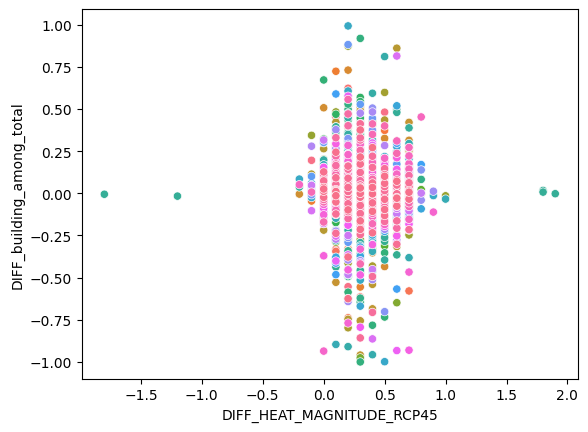

In [188]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsap
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
from matplotlib import pyplot as plt
import seaborn as sns



sns.scatterplot(x=df_panel['DIFF_HEAT_MAGNITUDE_RCP45'],  
                y=df_panel['DIFF_building_among_total'],
                hue=df_panel['BQ_COMPANY_NAME'],
                legend=False).set(title=                
                '')
 
plt.show()

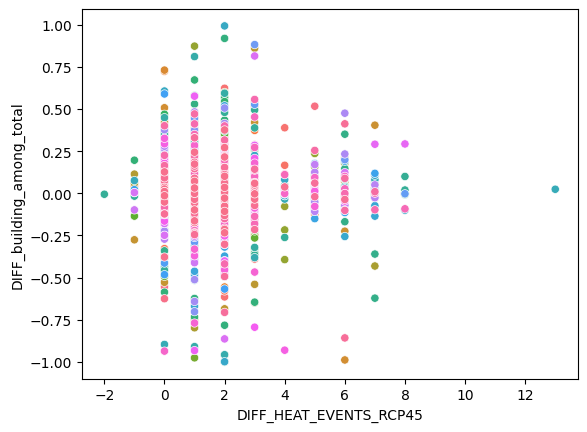

In [189]:
sns.scatterplot(x=df_panel['DIFF_HEAT_EVENTS_RCP45'],  
                y=df_panel['DIFF_building_among_total'],
                hue=df_panel['BQ_COMPANY_NAME'],
                legend=False).set(title=                
                '')
 
plt.show()

In [190]:
y_var_name = 'DIFF_building_among_total'
X_var_names = ['DIFF_HEAT_EVENTS_RCP45','DIFF_HEAT_MAGNITUDE_RCP45']
pooled_y=df_panel[y_var_name]
pooled_X=df_panel[X_var_names]
pooled_X = sm.add_constant(pooled_X)
pooled_olsr_model = sm.OLS(endog=pooled_y, exog=pooled_X)
pooled_olsr_model_results = pooled_olsr_model.fit()
print(pooled_olsr_model_results.summary())

                                OLS Regression Results                               
Dep. Variable:     DIFF_building_among_total   R-squared:                       0.003
Model:                                   OLS   Adj. R-squared:                  0.003
Method:                        Least Squares   F-statistic:                     7.673
Date:                       Sun, 13 Apr 2025   Prob (F-statistic):           0.000471
Time:                               21:01:26   Log-Likelihood:                 2981.5
No. Observations:                       5031   AIC:                            -5957.
Df Residuals:                           5028   BIC:                            -5937.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------